In [1]:
import pandas as pd
import seaborn as sns

In [15]:
digits = pd.read_csv("../data/mnist.csv")
digits.shape

(208, 6)

<Axes: xlabel='true_label', ylabel='Count'>

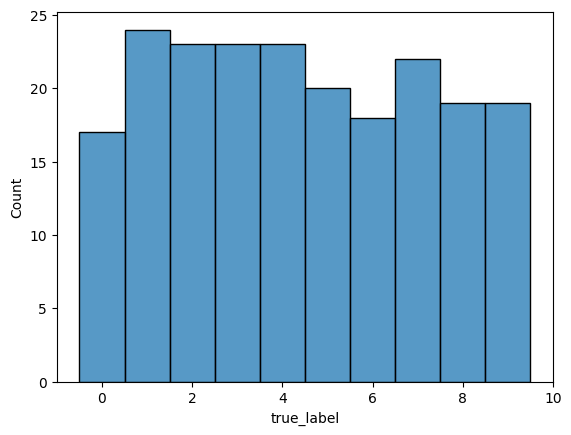

In [16]:
sns.histplot(digits, x="true_label", discrete=True)